In [1]:
# Import Dependencies
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import scipy.stats as st 
from scipy.stats import linregress
%matplotlib inline

In [2]:
# Read CSV file into Dataframe 
csv = ("Resources/master.csv")
df = pd.read_csv(csv).set_index("State")
pd.set_option("display.max_columns", 22, "display.colheader_justify", "center")
df.head(5)

,Number of Prescriptions,Total Population,Male,Male Population %,Female,Female Population %,18+ Population,18+ Population %,18+ Male,18+ Male %,18+ Female,18+ Female %,Usage: 18+ Estimate,Usage: 18+ 95% CI (Lower),Usage: 18+ 95% CI (Upper),Risk: 18+ Estimate,Risk: 18+ 95% CI (Lower),Risk: 18+ 95% CI (Upper),Disorder: 18+ Estimate,Disorder: 18+ 95% CI (Lower),Disorder: 18+ 95% CI (Upper)
State,,,,,,,,,,,,,,,,,,,,,
Alabama,180378,4893186,2365734,0.483,2527452,0.517,3800274,0.777,1808099,0.476,1992175,0.524,0.35%,0.13%,0.95%,89.40%,87.25%,91.22%,14.94%,12.08%,18.33%
Alaska,52751,736990,384653,0.522,352337,0.478,553631,0.751,290360,0.524,263271,0.476,0.80%,0.31%,2.04%,83.08%,80.26%,85.58%,16.57%,13.45%,20.25%
Arizona,509525,7174064,3564979,0.497,3609085,0.503,5534419,0.771,2728556,0.493,2805863,0.507,0.78%,0.32%,1.89%,86.87%,84.55%,88.89%,16.25%,13.13%,19.95%
Arkansas,173987,3011873,1478511,0.491,1533362,0.509,2309041,0.767,1118805,0.485,1190236,0.515,0.28%,0.10%,0.77%,88.74%,86.51%,90.64%,14.85%,12.00%,18.25%
California,2567486,39346023,19562882,0.497,19783141,0.503,30389382,0.772,14984186,0.493,15405196,0.507,0.27%,0.14%,0.51%,83.59%,82.10%,84.97%,16.70%,14.72%,18.89%


In [3]:
# Convert % to float 
def float_conversion (x): 
    return float(x.rstrip("%")) / 100 

df[["Usage: 18+ Estimate", 
    "Usage: 18+ 95% CI (Lower)",
    "Usage: 18+ 95% CI (Upper)",
    "Risk: 18+ Estimate",
    "Risk: 18+ 95% CI (Lower)",
    "Risk: 18+ 95% CI (Upper)",
    "Disorder: 18+ Estimate",
    "Disorder: 18+ 95% CI (Lower)",
    "Disorder: 18+ 95% CI (Upper)"
    ]] = df[["Usage: 18+ Estimate", 
    "Usage: 18+ 95% CI (Lower)",
    "Usage: 18+ 95% CI (Upper)",
    "Risk: 18+ Estimate",
    "Risk: 18+ 95% CI (Lower)",
    "Risk: 18+ 95% CI (Upper)",
    "Disorder: 18+ Estimate",
    "Disorder: 18+ 95% CI (Lower)",
    "Disorder: 18+ 95% CI (Upper)"
    ]].applymap(float_conversion)
df.head(5)

,Number of Prescriptions,Total Population,Male,Male Population %,Female,Female Population %,18+ Population,18+ Population %,18+ Male,18+ Male %,18+ Female,18+ Female %,Usage: 18+ Estimate,Usage: 18+ 95% CI (Lower),Usage: 18+ 95% CI (Upper),Risk: 18+ Estimate,Risk: 18+ 95% CI (Lower),Risk: 18+ 95% CI (Upper),Disorder: 18+ Estimate,Disorder: 18+ 95% CI (Lower),Disorder: 18+ 95% CI (Upper)
State,,,,,,,,,,,,,,,,,,,,,
Alabama,180378,4893186,2365734,0.483,2527452,0.517,3800274,0.777,1808099,0.476,1992175,0.524,0.0035,0.0013,0.0095,0.8940,0.8725,0.9122,0.1494,0.1208,0.1833
Alaska,52751,736990,384653,0.522,352337,0.478,553631,0.751,290360,0.524,263271,0.476,0.0080,0.0031,0.0204,0.8308,0.8026,0.8558,0.1657,0.1345,0.2025
Arizona,509525,7174064,3564979,0.497,3609085,0.503,5534419,0.771,2728556,0.493,2805863,0.507,0.0078,0.0032,0.0189,0.8687,0.8455,0.8889,0.1625,0.1313,0.1995
Arkansas,173987,3011873,1478511,0.491,1533362,0.509,2309041,0.767,1118805,0.485,1190236,0.515,0.0028,0.0010,0.0077,0.8874,0.8651,0.9064,0.1485,0.1200,0.1825
California,2567486,39346023,19562882,0.497,19783141,0.503,30389382,0.772,14984186,0.493,15405196,0.507,0.0027,0.0014,0.0051,0.8359,0.8210,0.8497,0.1670,0.1472,0.1889


## Visualizations
### NOTES:
* Prescriptions = Blue
* Population = Green 
* Usage = Orange
* Risk = Purple 
* Disorder = Red

### Are there any relationships between population and prescription? 

In [4]:
def bar(title, x_label, y_label): 
    
    plt.title(title, fontsize=20)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
        
    return plt.show()

States with the highest number of prescriptions in 2020 is California at 2,567,486.
States with the lowest number of prescriptions in 2020 is Wyoming at 16,027.


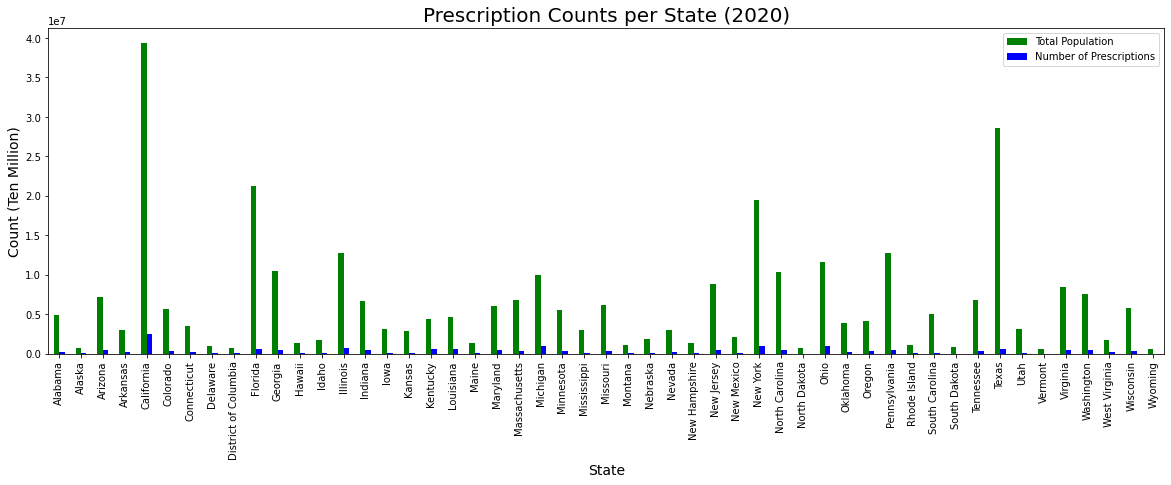

In [5]:
# Create a bar chart (population/prescription)
population_prescription = pd.DataFrame(df, columns=["Total Population", "Number of Prescriptions"])
population_prescription.plot(kind="bar", color=["green", "blue"], figsize=(20, 6))

high = df["Number of Prescriptions"].idxmax()
h_value = df["Number of Prescriptions"].max()
low = df["Number of Prescriptions"].idxmin()
l_value = df["Number of Prescriptions"].min()

print("States with the highest number of prescriptions in 2020 is {} at {}.".format(high, '{:,}'.format(h_value)))
print("States with the lowest number of prescriptions in 2020 is {} at {}.".format(low, '{:,}'.format(l_value)))

bar("Prescription Counts per State (2020)", "State", "Count (Ten Million)")

              Total Population
State                         
California        39346023    
Texas             28635442    
Florida           21216924    
New York          19514849    
Pennsylvania      12794885    


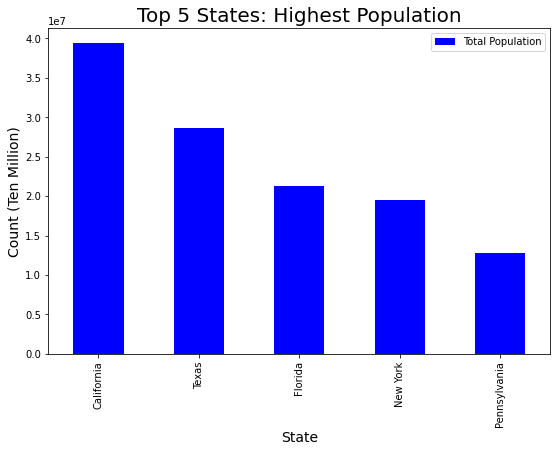

In [6]:
# Create a bar chart (Top 5 States: Highest Population Total)
population = pd.DataFrame(df, columns=["Total Population"]).sort_values(by="Total Population", ascending=False).head(5)
population.plot(kind="bar", color="blue", figsize=(9, 6))

print(population)
bar("Top 5 States: Highest Population", "State", "Count (Ten Million)")

            Number of Prescriptions
State                              
California          2567486        
Ohio                1046104        
New York            1005441        
Michigan             961265        
Illinois             727638        


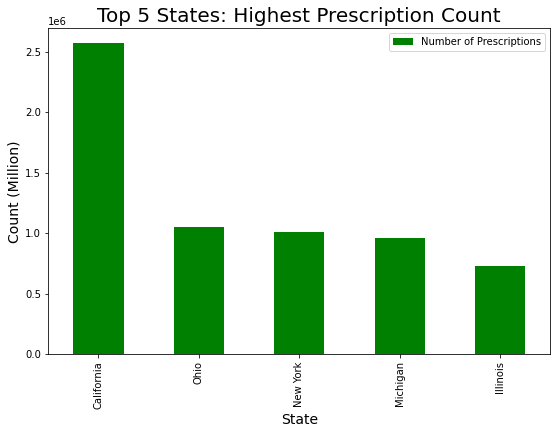

In [7]:
# Create a bar chart (Top 5 States - Highest Presciption Count)
prescription = pd.DataFrame(df, columns=["Number of Prescriptions"]).sort_values(by="Number of Prescriptions", ascending=False).head(5)
prescription.plot(kind="bar", color="green", figsize=(9, 6))

print(prescription)
bar("Top 5 States: Highest Prescription Count", "State", "Count (Million)")

In [8]:
# Define a function to create Linear Regression plots
def func(x,y, x_label, y_label, title):
    correlation = st.pearsonr(x,y)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    
    regress_values = x * slope + intercept 
        
    # Create plot
    plt.figure(figsize=(9,7))
    markersize = 50 
    plt.scatter(x, y, markersize)
    plt.plot(x, regress_values, "r-")
    
    plt.title(title, fontsize=20)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    
    plt.tight_layout()
    print(f'The r-squared is: {rvalue**2:.2f}')
    print(f'The correlation is: {correlation}')
    
    return plt.show()

The r-squared is: 0.76
The correlation is: PearsonRResult(statistic=0.8732590900148117, pvalue=6.471114397050187e-17)


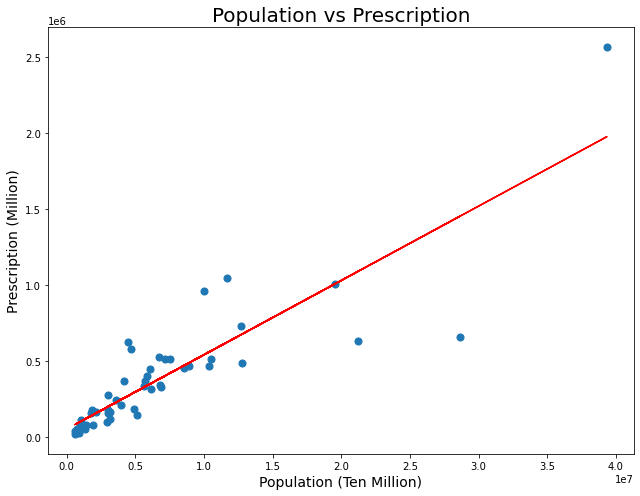

In [9]:
# Create a scatter plot (Population vs Prescription)
corr1 = pd.DataFrame(df, columns=["Total Population", "Number of Prescriptions"])
line_eq = func(corr1["Total Population"], corr1["Number of Prescriptions"], "Population (Ten Million)", "Prescription (Million)", "Population vs Prescription")

### Are there any relationships between substance usage, risk, and disorder?

                      Usage: 18+ Estimate
State                                    
District of Columbia        0.0113       
New Hampshire               0.0110       
West Virginia               0.0087       
Maine                       0.0085       
Alaska                      0.0080       


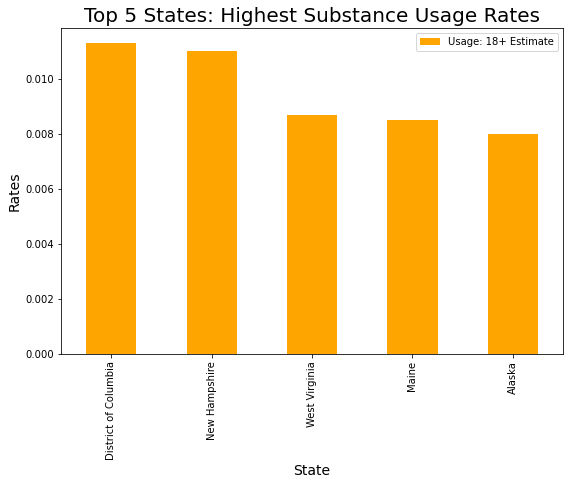

In [10]:
# Create a bar chart (Top 5 States - Substance Usage Rates)
usage = pd.DataFrame(df, columns=["Usage: 18+ Estimate"]).sort_values(by="Usage: 18+ Estimate", ascending=False).head(5)
usage.plot(kind="bar", color="orange", figsize=(9, 6))

print(usage)
bar("Top 5 States: Highest Substance Usage Rates", "State", "Rates")

                Risk: 18+ Estimate
State                             
South Carolina        0.8941      
Alabama               0.8940      
Mississippi           0.8918      
Kentucky              0.8906      
Delaware              0.8885      


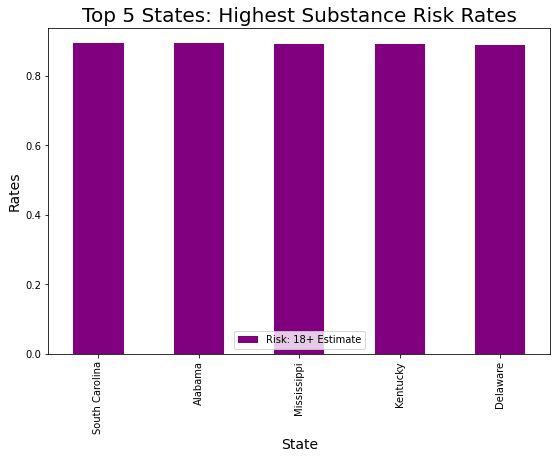

In [11]:
# Create a bar chart (Top 5 States - Substance Risk Rates)
risk = pd.DataFrame(df, columns=["Risk: 18+ Estimate"]).sort_values(by="Risk: 18+ Estimate", ascending=False).head(5)
risk.plot(kind="bar", color="purple", figsize=(9, 6))

print(risk)
bar("Top 5 States: Highest Substance Risk Rates", "State", "Rates")

                      Disorder: 18+ Estimate
State                                       
District of Columbia          0.2121        
Montana                       0.1922        
Oregon                        0.1913        
Washington                    0.1859        
South Dakota                  0.1855        


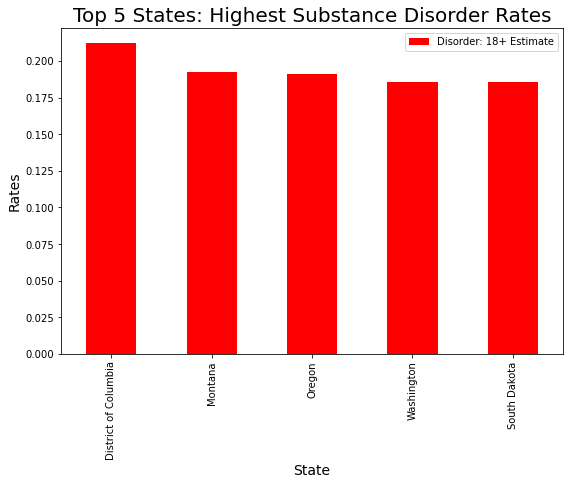

In [12]:
# Create a bar chart (Top 5 States - Substance Disorder Rates)
disorder = pd.DataFrame(df, columns=["Disorder: 18+ Estimate"]).sort_values(by="Disorder: 18+ Estimate", ascending=False).head(5)
disorder.plot(kind="bar", color="red", figsize=(9, 6))

print(disorder)
bar("Top 5 States: Highest Substance Disorder Rates", "State", "Rates")

The r-squared is: 0.04
The correlation is: PearsonRResult(statistic=-0.20549841158329019, pvalue=0.14799193827185786)


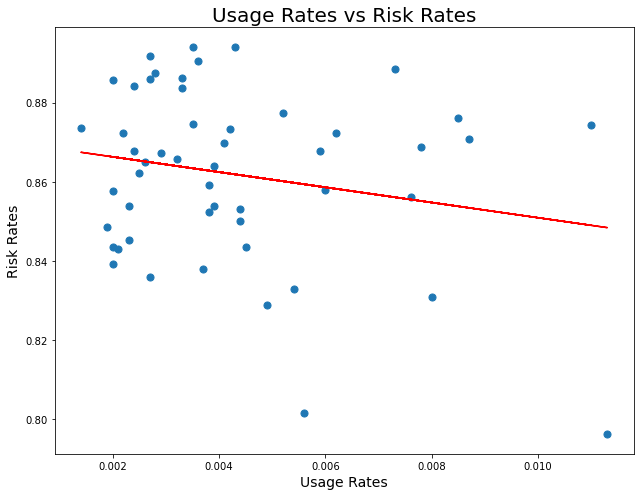

In [13]:
# Create a scatter plot (Usage vs Risk)
corr2 = pd.DataFrame(df, columns=["Usage: 18+ Estimate", "Risk: 18+ Estimate"])
line_eq = func(corr2["Usage: 18+ Estimate"], corr2["Risk: 18+ Estimate"],"Usage Rates", "Risk Rates", "Usage Rates vs Risk Rates")


The r-squared is: 0.19
The correlation is: PearsonRResult(statistic=0.4346835379412629, pvalue=0.0014356011783690297)


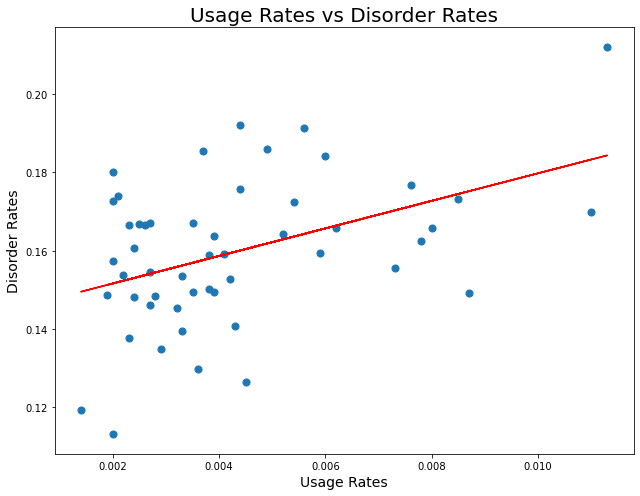

In [14]:
# Create a scatter plot (Usage vs Disorder)
corr3 = pd.DataFrame(df, columns=["Usage: 18+ Estimate", "Disorder: 18+ Estimate"])
line_eq = func(corr3["Usage: 18+ Estimate"], corr3["Disorder: 18+ Estimate"],"Usage Rates", "Disorder Rates", "Usage Rates vs Disorder Rates")


The r-squared is: 0.37
The correlation is: PearsonRResult(statistic=-0.6115497356115029, pvalue=1.8668424070261943e-06)


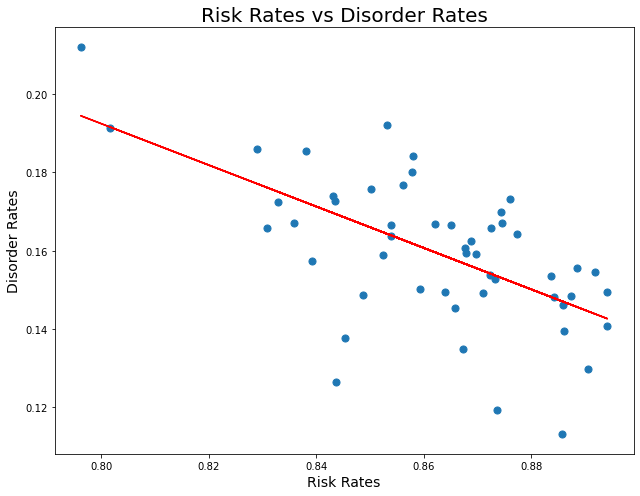

In [15]:
# Create a scatter plot (Risk vs Disorder)
risk_disorder = pd.DataFrame(df, columns=["Risk: 18+ Estimate", "Disorder: 18+ Estimate"])
line_eq = func(risk_disorder["Risk: 18+ Estimate"], risk_disorder["Disorder: 18+ Estimate"],"Risk Rates", "Disorder Rates", "Risk Rates vs Disorder Rates")


### Are there any relationships between prescription and substance usage, risk, and disorder?

The r-squared is: 0.09
The correlation is: PearsonRResult(statistic=-0.30772286239553476, pvalue=0.028041334018062747)


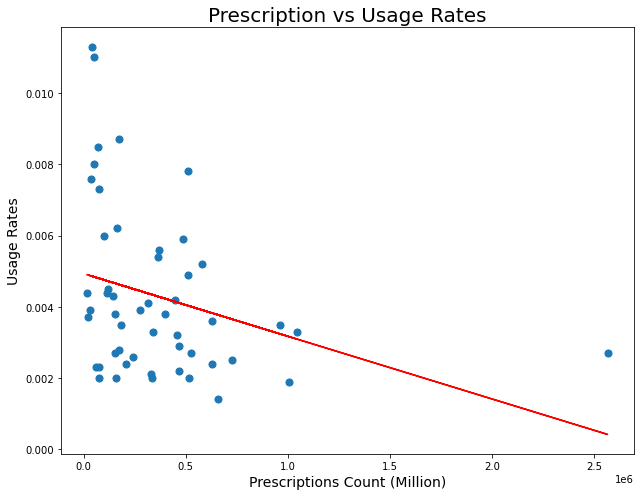

In [16]:
# Create a scatter plot (Prescription vs Usage)
corr4 = pd.DataFrame(df, columns=["Number of Prescriptions", "Usage: 18+ Estimate"])
line_eq = func(corr4["Number of Prescriptions"], corr4["Usage: 18+ Estimate"],"Prescriptions Count (Million)", "Usage Rates", "Prescription vs Usage Rates")


The r-squared is: 0.00
The correlation is: PearsonRResult(statistic=0.017079400259510297, pvalue=0.9053101283784313)


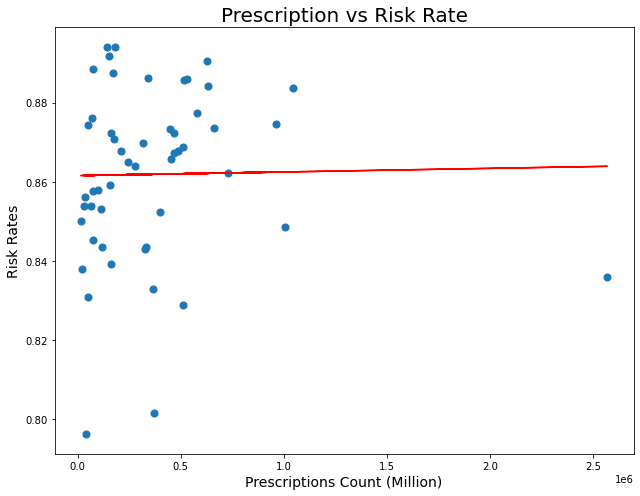

In [17]:
# Create a scatter plot (Prescription vs Disorder)
pop_risk = pd.DataFrame(df, columns=["Number of Prescriptions", "Risk: 18+ Estimate"])
line_eq = func(pop_risk["Number of Prescriptions"], pop_risk["Risk: 18+ Estimate"],"Prescriptions Count (Million)", "Risk Rates", "Prescription vs Risk Rate")


The r-squared is: 0.03
The correlation is: PearsonRResult(statistic=-0.15990648909807922, pvalue=0.2623384158770899)


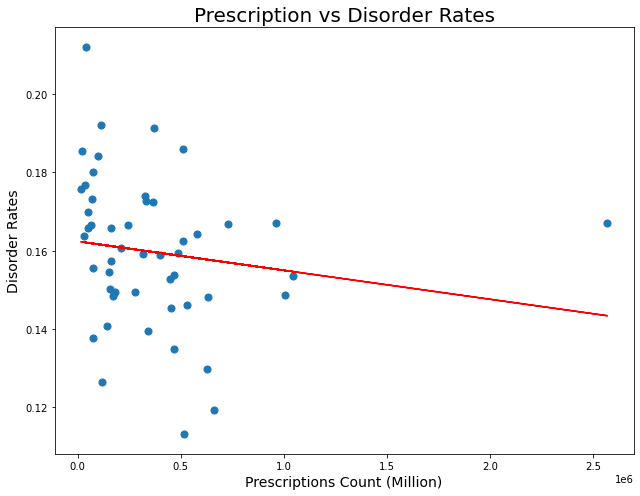

In [18]:
# Create a scatter plot (Population vs Disorder)
corr5 = pd.DataFrame(df, columns=["Number of Prescriptions", "Disorder: 18+ Estimate"])
line_eq = func(corr5["Number of Prescriptions"], corr5["Disorder: 18+ Estimate"],"Prescriptions Count (Million)", "Disorder Rates", "Prescription vs Disorder Rates")


In [19]:
rx_rate = (df["Number of Prescriptions"] / df["Total Population"])
df.insert(2, "Population Rx Rate", rx_rate)
pd.set_option("display.max_columns", 23, "display.colheader_justify", "center")
df.head(5)

,Number of Prescriptions,Total Population,Population Rx Rate,Male,Male Population %,Female,Female Population %,18+ Population,18+ Population %,18+ Male,18+ Male %,18+ Female,18+ Female %,Usage: 18+ Estimate,Usage: 18+ 95% CI (Lower),Usage: 18+ 95% CI (Upper),Risk: 18+ Estimate,Risk: 18+ 95% CI (Lower),Risk: 18+ 95% CI (Upper),Disorder: 18+ Estimate,Disorder: 18+ 95% CI (Lower),Disorder: 18+ 95% CI (Upper)
State,,,,,,,,,,,,,,,,,,,,,,
Alabama,180378,4893186,0.036863,2365734,0.483,2527452,0.517,3800274,0.777,1808099,0.476,1992175,0.524,0.0035,0.0013,0.0095,0.8940,0.8725,0.9122,0.1494,0.1208,0.1833
Alaska,52751,736990,0.071576,384653,0.522,352337,0.478,553631,0.751,290360,0.524,263271,0.476,0.0080,0.0031,0.0204,0.8308,0.8026,0.8558,0.1657,0.1345,0.2025
Arizona,509525,7174064,0.071023,3564979,0.497,3609085,0.503,5534419,0.771,2728556,0.493,2805863,0.507,0.0078,0.0032,0.0189,0.8687,0.8455,0.8889,0.1625,0.1313,0.1995
Arkansas,173987,3011873,0.057767,1478511,0.491,1533362,0.509,2309041,0.767,1118805,0.485,1190236,0.515,0.0028,0.0010,0.0077,0.8874,0.8651,0.9064,0.1485,0.1200,0.1825
California,2567486,39346023,0.065254,19562882,0.497,19783141,0.503,30389382,0.772,14984186,0.493,15405196,0.507,0.0027,0.0014,0.0051,0.8359,0.8210,0.8497,0.1670,0.1472,0.1889


The r-squared is: 0.00
The correlation is: PearsonRResult(statistic=0.06062366093019406, pvalue=0.6725903902927044)


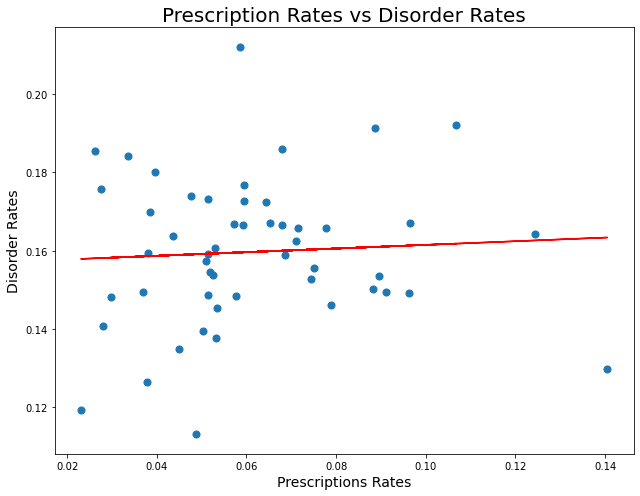

In [20]:
# Create a scatter plot (Population vs Disorder)
pop_dis_rates = pd.DataFrame(df, columns=["Population Rx Rate", "Disorder: 18+ Estimate"])
line_eq = func(pop_dis_rates["Population Rx Rate"], pop_dis_rates["Disorder: 18+ Estimate"],"Prescriptions Rates", "Disorder Rates", "Prescription Rates vs Disorder Rates")


               Population Rx Rate  Disorder: 18+ Estimate
State                                                    
Kentucky            0.140482               0.1298        
Louisiana           0.124346               0.1643        
Montana             0.106819               0.1922        
Michigan            0.096378               0.1672        
West Virginia       0.096352               0.1493        


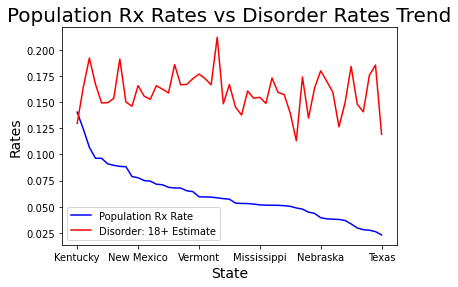

In [21]:
trend = pop_dis_rates.sort_values(by="Population Rx Rate", ascending=False)
trend.plot(kind="line", color=("blue", "red"))

print(trend.head(5))
bar("Population Rx Rates vs Disorder Rates Trend", "State", "Rates")

      State       Population 18+  Risk Population 18+
0       Kentucky      3454333           3076429      
1      Louisiana      3567057           3129736      
2        Montana       833116            710815      
3       Michigan      7812144           6832501      
4  West Virginia      1442209           1256020      


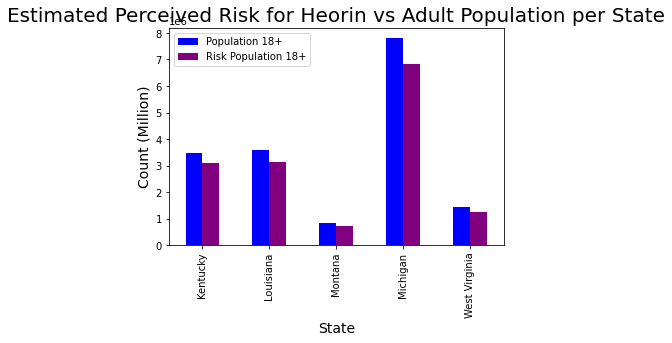

In [22]:
# Comparing risk rate to each states' overall population of 18+ 
# Since Risk 18+ Estimate is in percent form, I had to convert it to decimals and then mulitply by 18+ Population
# to get Risk Population 18+ data

risk_usage = pd.DataFrame({
    'State': ['Kentucky', 'Louisiana', 'Montana', 'Michigan', 'West Virginia'],
    'Population 18+': [3454333,3567057,833116,7812144,1442209],
    'Risk Population 18+': [3076429,3129736,710815,6832501,1256020]
})
risk_usage.plot(x="State", y=["Population 18+", "Risk Population 18+"], kind="bar",color=("blue", "purple"))

print(risk_usage)
bar("Estimated Perceived Risk for Heorin vs Adult Population per State", "State", "Count (Million)")

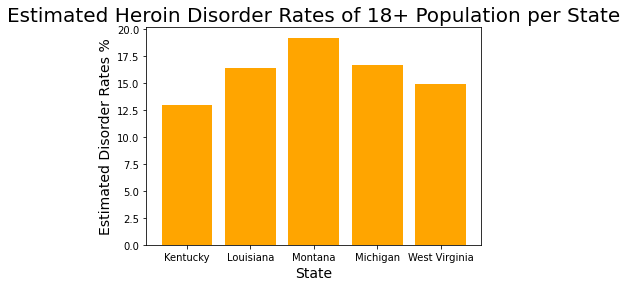

In [23]:
# Comparing each state's estimated disorder rate to each other
states = ["Kentucky","Louisiana","Montana","Michigan","West Virginia"]
disorder_estimate = [12.98,16.43,19.22,16.72,14.93]
x_axis = np.arange(len(disorder_estimate))

plt.bar(x_axis, disorder_estimate, color="orange", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Kentucky","Louisiana","Montana","Michigan","West Virginia"])

bar("Estimated Heroin Disorder Rates of 18+ Population per State", "State", "Estimated Disorder Rates %")

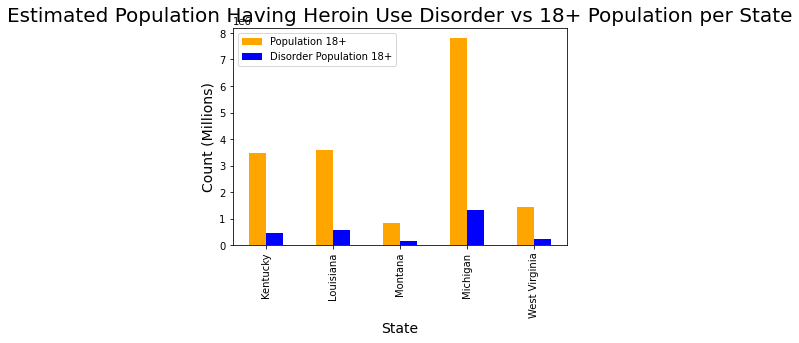

In [24]:
# Comparing disorder rate to each states' overall population of 18+ 
# Since Disorder 18+ Estimate is in percent form, I had to convert it to decimals and then mulitply by 18+ Population
# to get Disorder Population 18+ data

disorder_usage = pd.DataFrame({
    'State': ['Kentucky', 'Louisiana', 'Montana', 'Michigan', 'West Virginia'],
    'Population 18+': [3454333,3567057,833116,7812144,1442209],
    'Disorder Population 18+': [448372,586067,160125,1306190,215322]
})

disorder_usage.plot(x="State", y=["Population 18+", "Disorder Population 18+"], kind="bar",color={"blue","orange"})
bar("Estimated Population Having Heroin Use Disorder vs 18+ Population per State", "State", "Count (Millions)")

In [25]:
def pie(title): 
    
    plt.title(title, fontsize=20)
    fontsize =14
        
    return plt.show()

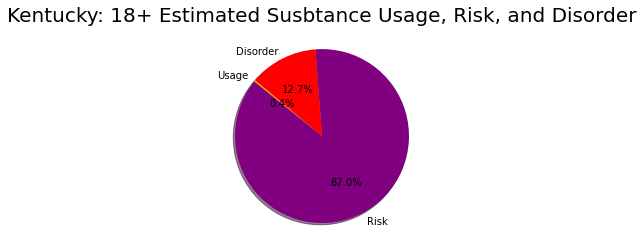

In [26]:
# Pie chart for Kentucky Population Opioid Use
labels = ["Usage","Risk","Disorder"]
sizes = [12436,3076429,448372]
colors = ["orange","purple","red"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
pie("Kentucky: 18+ Estimated Susbtance Usage, Risk, and Disorder")

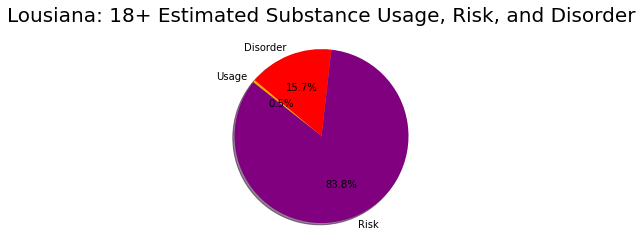

In [27]:
# Pie chart for Louisiana Population Opioid Use
labels = ["Usage","Risk","Disorder"]
sizes = [18549,3129736,586067]
colors = ["orange","purple","red"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
pie("Lousiana: 18+ Estimated Substance Usage, Risk, and Disorder")

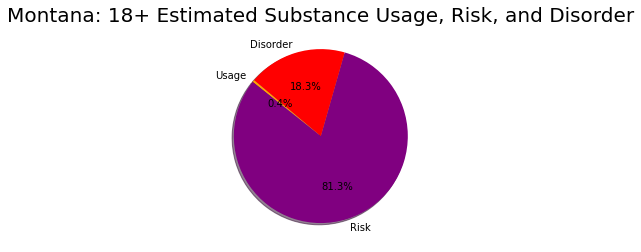

In [28]:
# Pie chart for Montana Population Opioid Use
labels = ["Usage","Risk","Disorder"]
sizes = [3666,710815,160125]
colors = ["orange","purple","red"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
pie("Montana: 18+ Estimated Substance Usage, Risk, and Disorder")

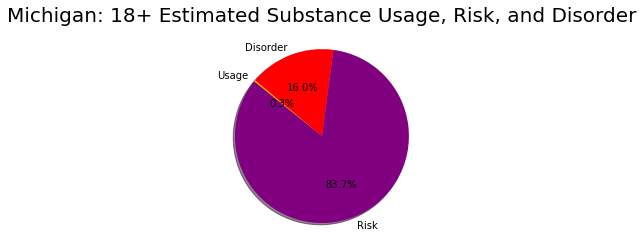

In [29]:
# Pie chart for Michigan Population Opioid Use
labels = ["Usage","Risk","Disorder"]
sizes = [27343,6832501,1306190]
colors = ["orange","purple","red"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
pie("Michigan: 18+ Estimated Substance Usage, Risk, and Disorder")

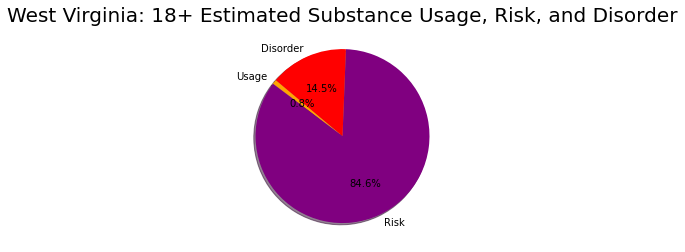

In [30]:
# Pie chart for West Virginia Population Opioid Use
labels = ["Usage","Risk","Disorder"]
sizes = [12547,1256020,215322]
colors = ["orange","purple","red"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
pie("West Virginia: 18+ Estimated Substance Usage, Risk, and Disorder")